# Machine learning for titer prediction
The proteomics data we have for isoprenol titer is extremely underutilized - I'd like to do some ML on it to see if we can learn anything about predicting titer, or about biological correlations between proteins. 

I'm still trying to identify potential questions to answer.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

I've already pulled data from EDD, normalized it, and merged it.

In [2]:
data_file = './data/normalized_proteomics_pivot_c0-c5.csv'
omics = pd.read_csv(data_file, index_col=0)
omics

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,1.039569,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.002800,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.034610,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,1.007489,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.901769,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.951802,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.992665,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,0.145406,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


In [3]:
omics[omics['PP_0002'] >  26.6]

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,


In [4]:
omics.max(axis = 0)

EF_1364         3.323838
MM_1762         1.895864
PP_0001         2.246949
PP_0002         3.265267
PP_0003         2.620110
                  ...   
SPy_1046        2.366776
YNR043W         1.951615
b4055 JW4015    4.789041
neo             2.587007
isoprenol       4.668539
Length: 1675, dtype: float64

### Drop any lines with missing isoprenol measurements

In [5]:
omics = omics.dropna(axis = 0, how = 'any', subset=['isoprenol'])
omics

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,1.039569,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.002800,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.034610,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,1.007489,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.901769,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.951802,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.992665,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,0.145406,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


### Drop any columns with any missing values

In [6]:
omics = omics.dropna(axis = 1, how = 'any')
omics

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,1.039569,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.002800,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.034610,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,1.007489,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.901769,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.951802,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.992665,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,0.145406,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


In [7]:
omics.isnull().sum().sum()

0

In [8]:
omics.isna().sum().sum()

0

In [9]:
np.where(omics.isna())

(array([], dtype=int64), array([], dtype=int64))

In [10]:
omics.to_csv('./data/normalized_proteomics_pivot_cleaned.csv')

### get a list of protein measurements
The protein measurements are every column except the last one

In [11]:
protein_measurements = omics.columns[:-1]
protein_measurements

Index(['EF_1364', 'MM_1762', 'PP_0001', 'PP_0002', 'PP_0003', 'PP_0004',
       'PP_0005', 'PP_0006', 'PP_0009', 'PP_0010',
       ...
       'PP_5413', 'PP_5414', 'PP_5415', 'PP_5416', 'PP_5417', 'PP_5418',
       'SPy_1046', 'YNR043W', 'b4055 JW4015', 'neo'],
      dtype='object', length=1674)

### Define X and y for ML

In [12]:
X = omics[protein_measurements]
y = omics['isoprenol']
X

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,1.039569,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,...,0.950618,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129
Control-R11_c0,1.002800,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,...,1.020609,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979
Control-R12_c0,1.034610,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,...,0.985870,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022
Control-R13_c0,1.007489,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,...,1.029636,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219
Control-R14_c0,0.901769,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,...,1.063534,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.951802,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,...,0.685504,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801
PP_5419-R3_c0,0.992665,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,...,0.680503,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077
PP_5420-R1_c0,0.145406,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,...,0.678373,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907


In [13]:
X.columns[-10:]

Index(['PP_5413', 'PP_5414', 'PP_5415', 'PP_5416', 'PP_5417', 'PP_5418',
       'SPy_1046', 'YNR043W', 'b4055 JW4015', 'neo'],
      dtype='object')

In [14]:
dcas9 = X['SPy_1046'].copy()

In [15]:
y

line_name_rep_cycle
Control-R10_c0    1.024392
Control-R11_c0    1.120367
Control-R12_c0    1.178920
Control-R13_c0    0.720284
Control-R14_c0    1.030501
                    ...   
PP_5419-R2_c0     2.153361
PP_5419-R3_c0     2.397354
PP_5420-R1_c0     0.484521
PP_5420-R2_c0     0.527125
PP_5420-R3_c0     0.556424
Name: isoprenol, Length: 1323, dtype: float64

### Get X and y for dCas9 prediction
Drop the dCas9 column from X and make it a separate target.

In [16]:
dcas9_column_name = 'SPy_1046'
X_dcas9 = omics.copy().drop(columns=dcas9_column_name)
y_dcas9 = X[dcas9_column_name].copy()

### Get convenience values
Get number of gRNA, cycle, and whether or not the line is a control based on the dataframe index (the line name)

In [17]:
omics_index = omics.index.values
cycle_label = [int(x[-1]) for x in omics_index]
num_grna = [x.count('PP') for x in omics_index]
is_control = [1 if 'ontrol' in x else 0 for x in omics_index]

### Scale data for ML

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm
X_norm_df = X.copy()
X_norm_df.iloc[:,:] = X_norm
X_norm_df

X_dcas9_norm = scaler.fit_transform(X_dcas9)
X_dcas9_norm_df = X_dcas9.copy()
X_dcas9_norm_df.iloc[:,:] = X_dcas9_norm
X_dcas9_norm_df

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.149900,-0.281189,0.308367,0.289081,0.606700,0.174632,-0.549943,0.009876,0.548437,0.662307,...,-0.443259,-0.497674,-0.438881,-0.923134,-0.569418,-0.884101,-0.160699,0.120556,0.590082,-0.770124
Control-R11_c0,0.066923,0.118737,-0.573422,0.040540,0.249570,0.036062,-0.536405,0.701809,0.462710,0.361595,...,-0.136639,-0.227855,-0.263015,-0.687768,-0.093442,-0.865230,0.185868,0.515916,0.383686,-0.654919
Control-R12_c0,0.138710,0.150734,0.711289,-0.714881,0.667826,0.211040,0.970089,0.296928,0.262681,0.066546,...,-0.288825,-0.116295,-0.065096,-0.632144,-0.554151,4.935585,0.001667,-0.334810,0.674388,-0.584634
Control-R13_c0,0.077506,-0.356924,0.189971,1.605096,0.037929,0.281263,-0.189083,0.385237,0.874200,0.617014,...,-0.097093,0.209620,0.128999,-0.282551,-0.168551,-0.866134,-0.045064,-0.338609,-0.273058,-1.135165
Control-R14_c0,-0.161069,-0.412450,0.853070,0.532161,0.308258,-0.222396,-0.397185,0.496176,0.708461,-0.302715,...,0.051411,-0.118920,-0.253019,-0.331047,-0.820598,-0.845630,0.101844,-0.087749,0.484412,-0.762790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,-0.048162,-0.783561,0.266142,-1.699563,-0.932008,-1.397352,0.846469,-1.413481,-0.646025,-0.875146,...,-1.604686,-1.442446,-1.418324,-1.405939,-0.951125,-0.859958,-0.233246,0.512979,0.181218,0.585055
PP_5419-R3_c0,0.044052,-0.686579,0.354443,-1.121135,-0.727728,-0.695597,2.219319,-1.479074,-0.411705,0.713165,...,-1.626593,-1.437710,-1.352363,-1.507146,-1.443294,-0.859530,-0.387407,0.151771,0.464784,0.877936
PP_5420-R1_c0,-1.867935,-0.059183,0.335614,-0.839507,-0.484354,-1.684347,1.206239,-3.309997,-0.914643,-0.208174,...,-1.635926,-1.239291,-1.867820,-1.120770,-0.855739,-0.812398,-1.432002,-0.802596,1.953039,-1.418168


## "Machine learning"
Want to try some basic sklearn on the data.

### PCA
See how well PCA can fit the data (how many components required) and whether PCA shows any obvious patterns with titer.

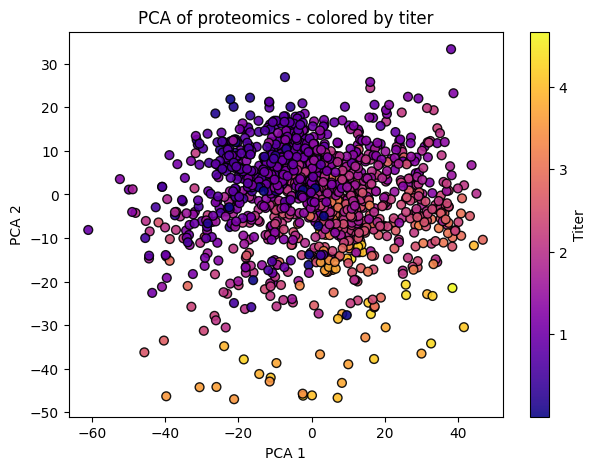

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_norm)
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y, s = 40, alpha = 0.9, edgecolors='k', cmap = 'plasma')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
cbar = plt.colorbar(label = 'Titer')
# cbar.ax.set_ylabel('Titer')

plt.title('PCA of proteomics - colored by titer')
fig.savefig('./figures/PCA_colored_by_titer.png')

In [20]:
X_pca[X_pca>100]

array([], dtype=float64)

Text(0.5, 1.0, 'PCA of proteomics - colored by titer')

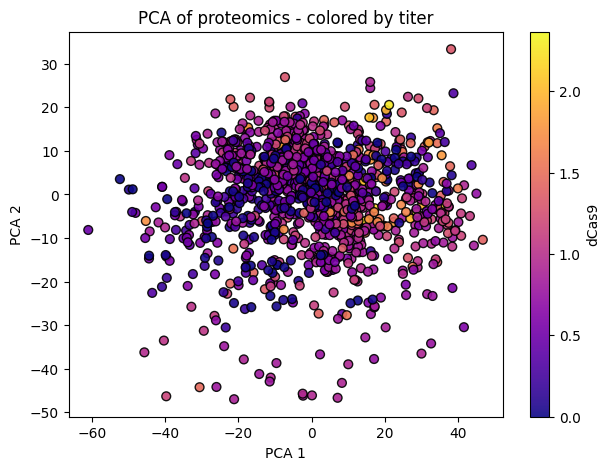

In [21]:
pca = PCA(n_components = 10)
X_pca_dcas9 = pca.fit_transform(X_dcas9_norm)
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c = y_dcas9, s = 40, alpha = 0.9, edgecolors='k', cmap = 'plasma')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
cbar = plt.colorbar(label = 'dCas9')
# cbar.ax.set_ylabel('Titer')

plt.title('PCA of proteomics - colored by titer')

In [22]:
X_pca.shape

(1323, 10)

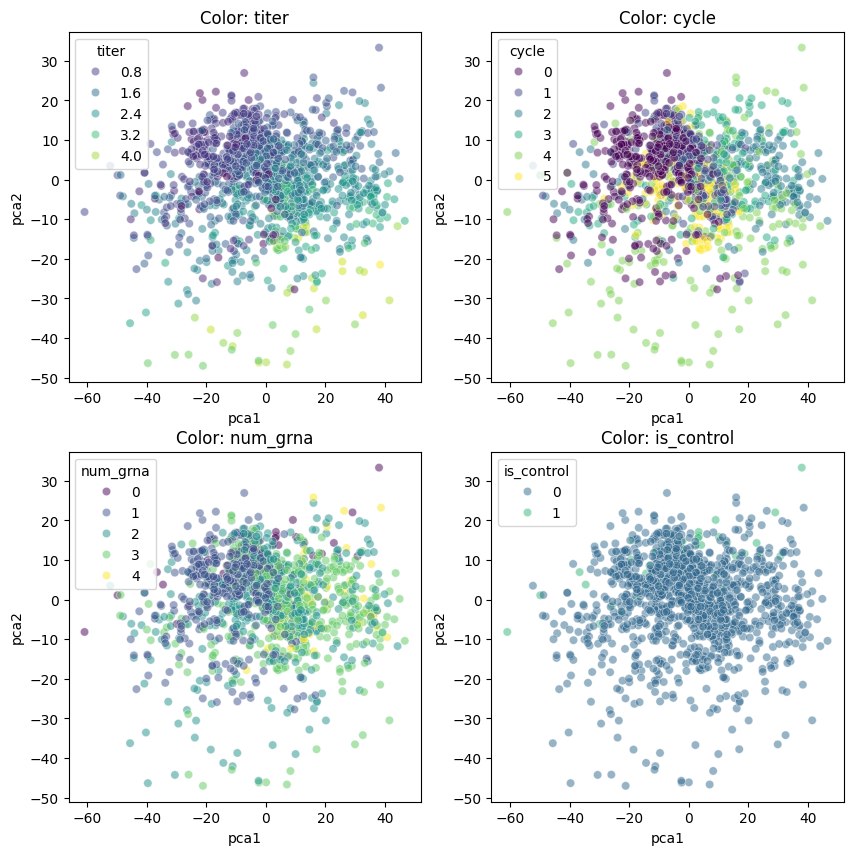

In [23]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize = (10,10))
df_plot = pd.DataFrame(dict(pca1 = X_pca[:,0], pca2 = X_pca[:, 1], titer = y, cycle = cycle_label, num_grna = num_grna, is_control = is_control))

c_lbls = ['titer', 'cycle', 'num_grna', 'is_control']
for idx, axis in enumerate(fig.get_axes()):
    sns.scatterplot(df_plot, x = 'pca1', y = 'pca2', hue = c_lbls[idx], palette = 'viridis', ax = axis, alpha = 0.5)
    axis.set_title(f'Color: {c_lbls[idx]}')
    

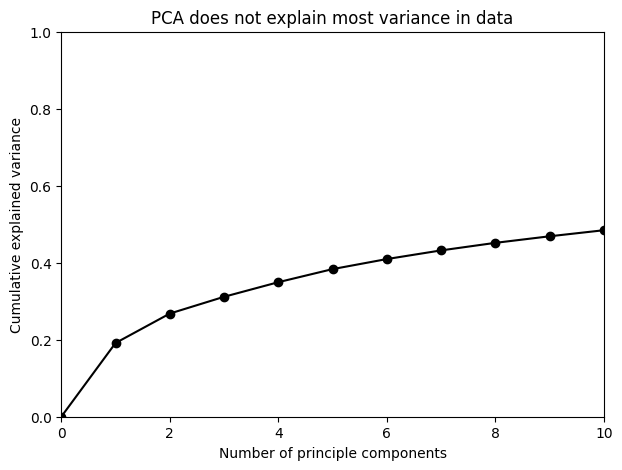

In [24]:
fig, ax = plt.subplots(figsize = (7,5))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
ax.plot(np.arange(0, pca.n_components+1), np.concatenate((np.array([0]), cumulative_variance)), c = 'k', marker = 'o')
ax.set_ylim([0,1])
ax.set_xlim([0, 10])
ax.set_xlabel('Number of principle components')
ax.set_ylabel('Cumulative explained variance')
ax.set_title('PCA does not explain most variance in data')
fig.savefig('./figures/PCA_var_exp.png')

### Exploring differences between cycles
PCA shows that the first PCA dimension fully separates the two cycles. What variables are most associated with PC1?

In [25]:
weights = pca.components_
weights.shape

(10, 1674)

In [26]:
weights_df = pd.DataFrame(dict(ft = protein_measurements, pca1 = weights[0,:], pca2 = weights[1,:]))
weights_df

,ft,pca1,pca2
0,EF_1364,0.007206,0.031148
1,MM_1762,0.027900,-0.011325
2,PP_0001,0.026320,0.024728
3,PP_0002,0.022009,0.038524
4,PP_0003,0.033551,0.028474
...,...,...,...
1669,PP_5418,0.001080,-0.002763
1670,SPy_1046,0.016656,-0.004770
1671,YNR043W,0.008270,-0.011808
1672,b4055 JW4015,0.019873,0.004869


<Axes: xlabel='pca1', ylabel='pca2'>

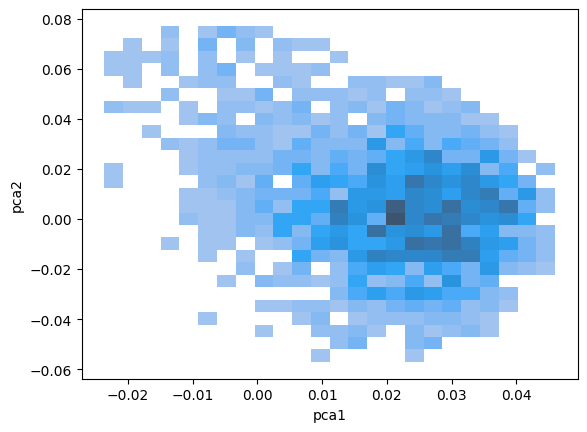

In [27]:
sns.histplot(weights_df, x = 'pca1', y = 'pca2')

identify top 10 PC1 components

In [28]:
top_10_pc1 = weights_df.sort_values(by='pca1', ascending = False)['ft'].head(10)
top_10_pc1

936     PP_2488
794     PP_2017
1174    PP_4200
293     PP_0759
682     PP_1702
1110    PP_3922
238     PP_0591
1242    PP_4397
1545    PP_5123
1100    PP_3819
Name: ft, dtype: object

In [29]:
top_10_pc1.iloc[0]

'PP_2488'

In [30]:
X_norm_df

,EF_1364,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,...,PP_5413,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.149900,-0.281189,0.308367,0.289081,0.606700,0.174632,-0.549943,0.009876,0.548437,0.662307,...,-0.443259,-0.497674,-0.438881,-0.923134,-0.569418,-0.884101,1.174626,-0.160699,0.120556,0.590082
Control-R11_c0,0.066923,0.118737,-0.573422,0.040540,0.249570,0.036062,-0.536405,0.701809,0.462710,0.361595,...,-0.136639,-0.227855,-0.263015,-0.687768,-0.093442,-0.865230,0.777642,0.185868,0.515916,0.383686
Control-R12_c0,0.138710,0.150734,0.711289,-0.714881,0.667826,0.211040,0.970089,0.296928,0.262681,0.066546,...,-0.288825,-0.116295,-0.065096,-0.632144,-0.554151,4.935585,0.963645,0.001667,-0.334810,0.674388
Control-R13_c0,0.077506,-0.356924,0.189971,1.605096,0.037929,0.281263,-0.189083,0.385237,0.874200,0.617014,...,-0.097093,0.209620,0.128999,-0.282551,-0.168551,-0.866134,0.167342,-0.045064,-0.338609,-0.273058
Control-R14_c0,-0.161069,-0.412450,0.853070,0.532161,0.308258,-0.222396,-0.397185,0.496176,0.708461,-0.302715,...,0.051411,-0.118920,-0.253019,-0.331047,-0.820598,-0.845630,0.349868,0.101844,-0.087749,0.484412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,-0.048162,-0.783561,0.266142,-1.699563,-0.932008,-1.397352,0.846469,-1.413481,-0.646025,-0.875146,...,-1.604686,-1.442446,-1.418324,-1.405939,-0.951125,-0.859958,-1.560768,-0.233246,0.512979,0.181218
PP_5419-R3_c0,0.044052,-0.686579,0.354443,-1.121135,-0.727728,-0.695597,2.219319,-1.479074,-0.411705,0.713165,...,-1.626593,-1.437710,-1.352363,-1.507146,-1.443294,-0.859530,-1.559339,-0.387407,0.151771,0.464784
PP_5420-R1_c0,-1.867935,-0.059183,0.335614,-0.839507,-0.484354,-1.684347,1.206239,-3.309997,-0.914643,-0.208174,...,-1.635926,-1.239291,-1.867820,-1.120770,-0.855739,-0.812398,-1.574687,-1.432002,-0.802596,1.953039


In [31]:
df_top10pcs = X_norm_df.loc[:, top_10_pc1]
df_top10pcs['cycle'] = [int(x[-1]) for x in df_top10pcs.index]

In [32]:
df_top10pcs

,PP_2488,PP_2017,PP_4200,PP_0759,PP_1702,PP_3922,PP_0591,PP_4397,PP_5123,PP_3819,cycle
line_name_rep_cycle,,,,,,,,,,,
Control-R10_c0,-0.319795,-0.404342,-0.511366,0.202459,0.149057,0.447921,0.678931,0.239326,0.056772,-0.205086,0
Control-R11_c0,-0.331986,0.122246,-0.102942,-0.482159,0.396156,-0.128805,-0.187381,0.181030,0.100305,-0.145573,0
Control-R12_c0,-0.252885,0.100715,-0.059127,-0.280700,0.099544,-0.147687,0.084718,0.488702,0.087044,-0.390890,0
Control-R13_c0,-0.584622,-0.472151,-0.081343,-0.220050,0.050521,-0.051781,-0.337669,0.238708,-0.124895,-0.339338,0
Control-R14_c0,-0.720193,-0.356117,-0.245107,-0.240207,0.119401,-0.139541,-0.166993,0.173105,-0.454217,-0.128457,0
...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.131790,3.826166,0.492205,0.209940,-0.473958,0.365832,0.576038,-1.205626,-0.763281,-0.283942,0
PP_5419-R3_c0,0.583708,4.644814,0.397157,0.198960,-0.399091,0.601811,-0.224928,-0.987080,-0.825013,0.690632,0
PP_5420-R1_c0,-0.937013,-1.225713,0.711894,0.004735,-0.888921,0.040893,-1.355011,-1.967996,-1.530972,-0.970343,0


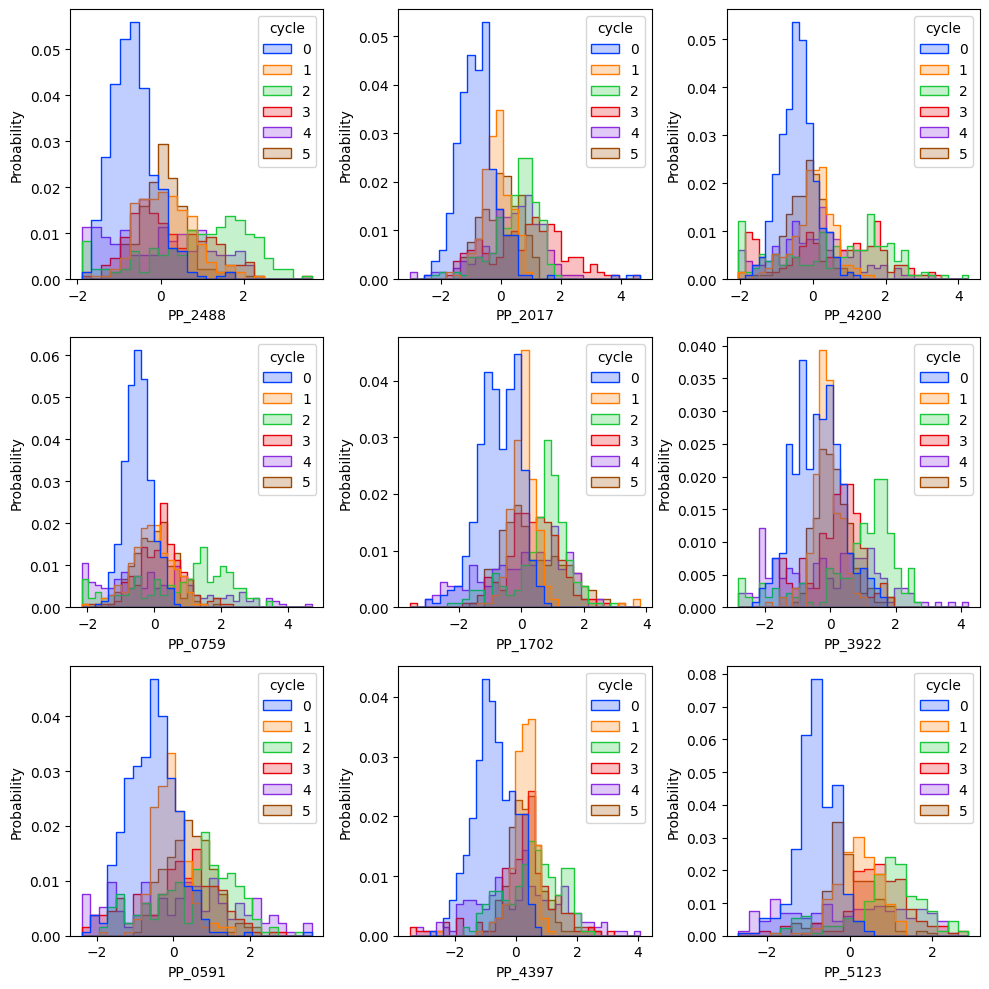

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (10,10))

for idx, axis in enumerate(fig.axes):
    sns.histplot(df_top10pcs, x = top_10_pc1.iloc[idx], hue = 'cycle', ax = axis, stat='probability', common_bins = True, element = 'step', palette='bright')
fig.tight_layout()

## Partial least square regression analysis

PLS does the following decomposition: 

$X = T P^T + E$

$Y = U Q^T + F$

$X, Y$: Features (n samples x m predictors) and response (n x 1)

$T, U$: Scores - projections of X/Y. Columns of T/U are chosen to maximize covariance. Both are shape (n samples x l scores).

$P, Q$: Loadings - Loadings of data within projected space of T/U. P: (m x l); Q: (1 x l).

$E, F$: I.I.D. Error matrices (same size as X/Y)

So - The columns of T and U should be correlated, which we can check. 

Predicted Y values should correlate with actual values, which we can check.




In [52]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict

In [55]:
pls = PLSRegression(n_components=2)

Text(0, 0.5, 'PLS CV prediction')

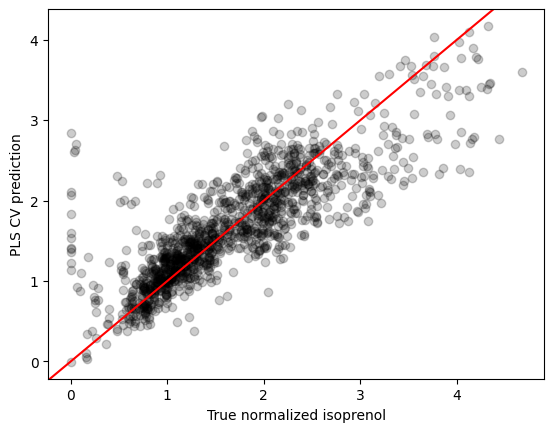

In [56]:
y_pred_pls_cv = cross_val_predict(
    estimator=pls,
    X = X_norm,
    y = y
)
fig, ax = plt.subplots()
ax.scatter(y, y_pred_pls_cv, alpha = 0.2, c = 'k')
ax.axline((0,0), slope = 1, c = 'r')
ax.set_xlabel('True normalized isoprenol')
ax.set_ylabel('PLS CV prediction')

In [57]:
pls = PLSRegression(n_components=2)
pls.fit(X_norm, y)

PLSRegression()

## Scores are correlated between columns of x/y but not in different columns

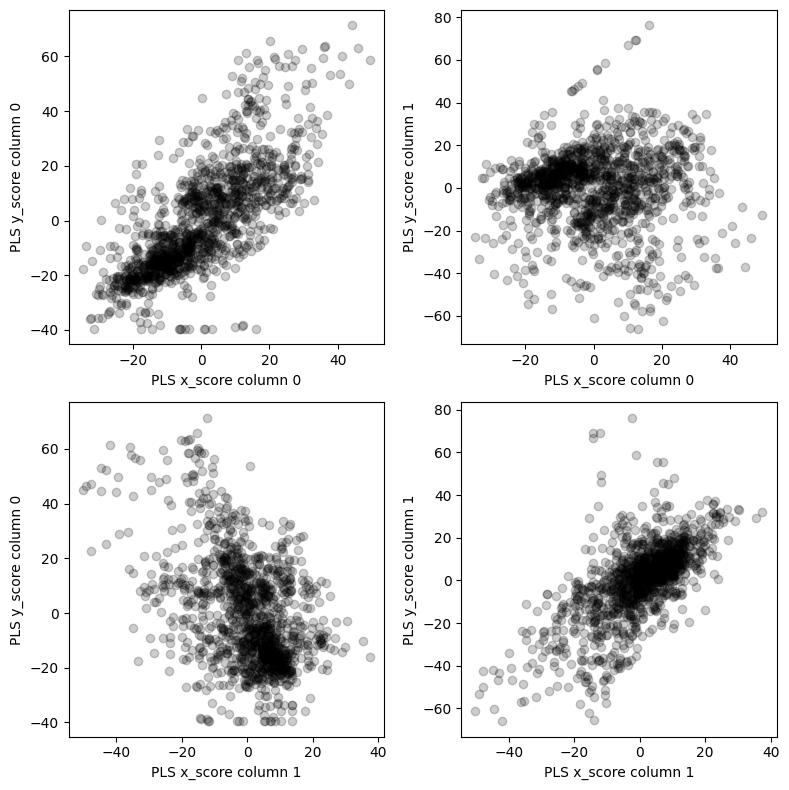

In [64]:
fig, ax = plt.subplots(2, 2, figsize = (8,8))
for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].scatter(pls.x_scores_[:, i], pls.y_scores_[:, j], c = 'k', alpha = 0.2)
        ax[i, j].set_xlabel(f'PLS x_score column {i}')
        ax[i, j].set_ylabel(f'PLS y_score column {j}')
fig.tight_layout()

In [39]:
pls.x_weights_.shape

(1674, 2)

In [41]:
pls.x_scores_.shape

(1323, 2)

In [69]:
pls.y_weights_.shape

(1, 2)

In [70]:
pls.x_loadings_.shape

(1674, 2)

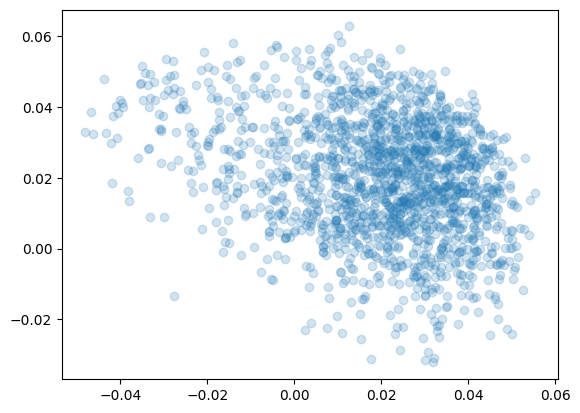

In [72]:
fig, ax  = plt.subplots()
ax.scatter(pls.x_loadings_[:,0], pls.x_loadings_[:, 1], alpha = 0.2)

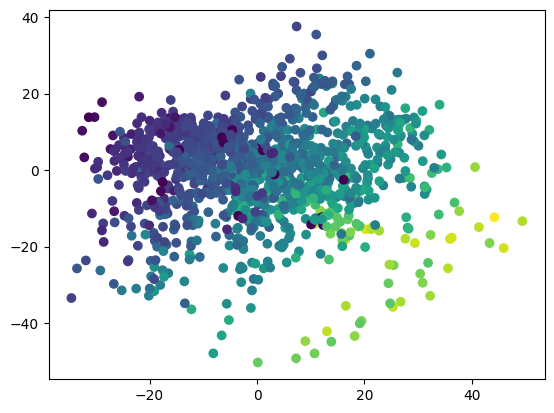

In [65]:
fig, ax  = plt.subplots()
ax.scatter(pls.y_scores_[:,0], pls.y_scores_[:, 1], c = y)

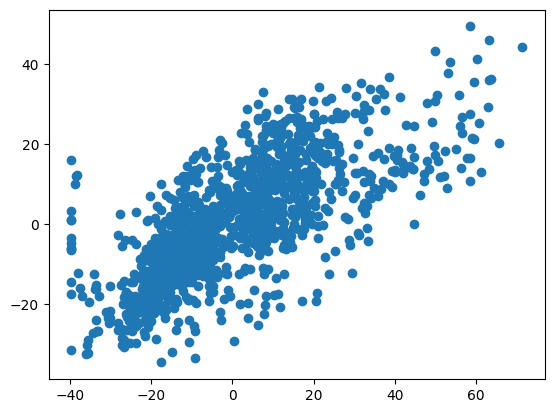

In [43]:
plt.scatter(pls.y_scores_[:, 0], pls.x_scores_[:, 0])

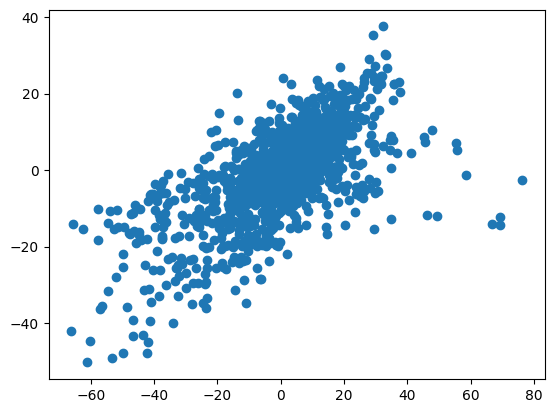

In [44]:
plt.scatter(pls.y_scores_[:, 1], pls.x_scores_[:, 1])

### Nonlinear dimensionality reduction


In [45]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, learning_rate='auto', init = 'random', perplexity = 10).fit_transform(X_norm)


### Plot tSNE results
Note that high-titer strains (top-left plot, light green/yellow points) appear in multiple clusters. 

The controls also cluster together really nicely (bottom right graph)

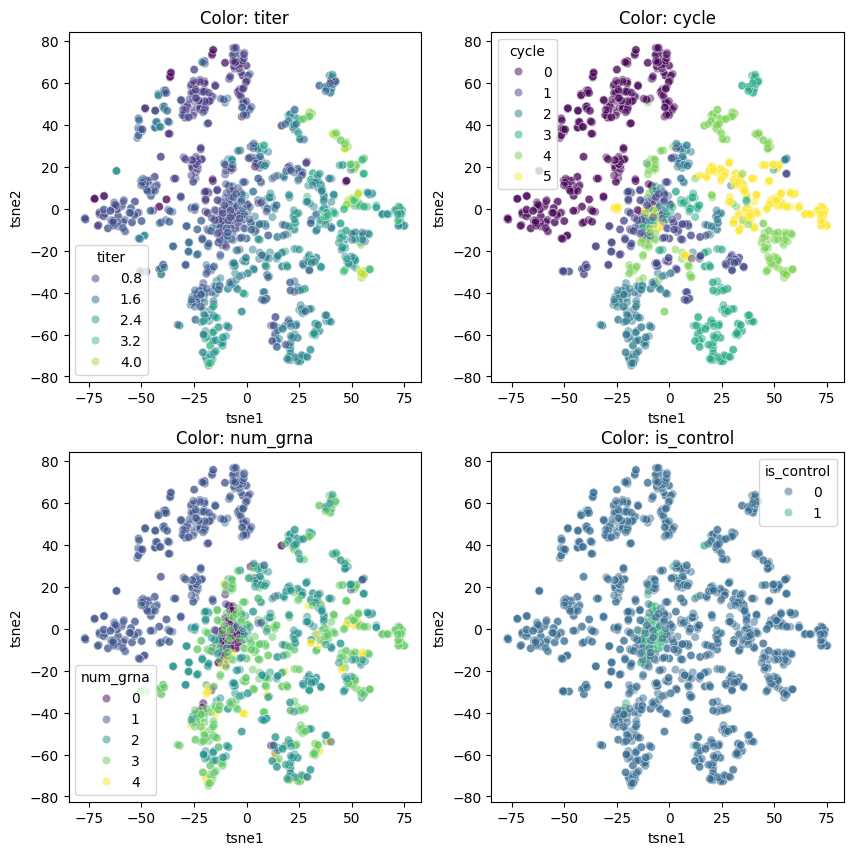

In [46]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize = (10,10))
df_plot = pd.DataFrame(dict(tsne1 = X_tsne[:,0], tsne2 = X_tsne[:, 1], titer = y, cycle = cycle_label, num_grna = num_grna, is_control = is_control))

c_lbls = ['titer', 'cycle', 'num_grna', 'is_control']
for idx, axis in enumerate(fig.get_axes()):
    sns.scatterplot(df_plot, x = 'tsne1', y = 'tsne2', hue = c_lbls[idx], palette = 'viridis', ax = axis, alpha = 0.5)
    axis.set_title(f'Color: {c_lbls[idx]}')

#### Varying t-SNE perplexity
There is a hyperparameter for t-SNE - perplexity - that determines how the dimensionality reduction works. Our key observation - that high-titer strains don't all cluster together - seems to be robust to changing perplexity.

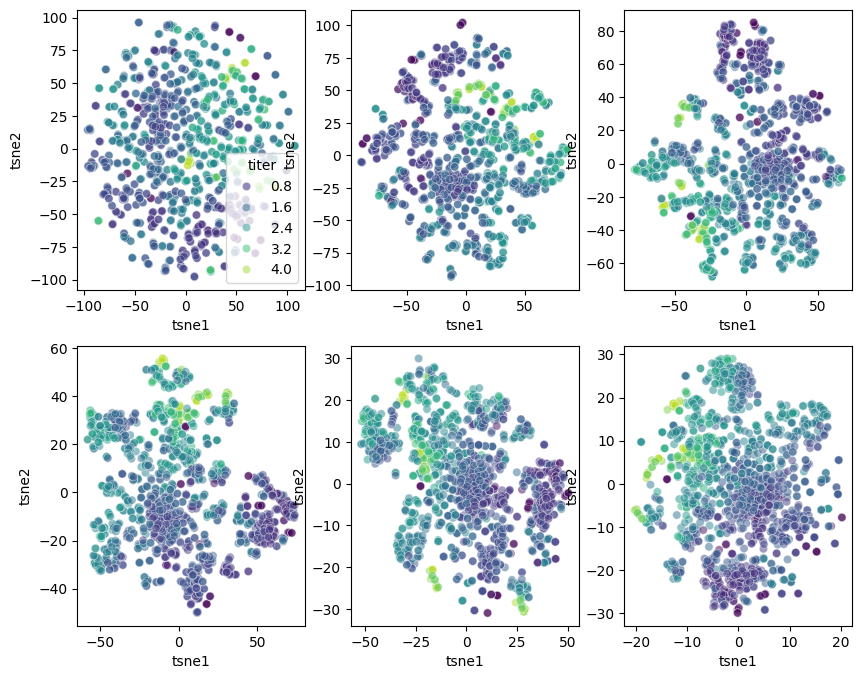

In [47]:
perplexity_vector = [2,5,10,20,50,100]
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10,8))
for i, ax in enumerate(fig.get_axes()):
    X_tsne = TSNE(n_components=2, learning_rate='auto', init = 'random',
                  perplexity = perplexity_vector[i]).fit_transform(X_norm)

    df_plot = pd.DataFrame(dict(tsne1 = X_tsne[:,0], tsne2 = X_tsne[:, 1], titer = y, cycle = cycle_label, num_grna = num_grna, is_control = is_control))
    sns.scatterplot(df_plot, x = 'tsne1', y = 'tsne2', hue = 'titer', palette = 'viridis', ax = ax, alpha = 0.5)
    axis.set_title(f'Perplexity = {perplexity_vector[i]}')
    if i != 0:
        ax.legend([],[], frameon=False)

### Spectral embedding
These are other dimensionality reduction techniques - not super useful I think.

```
>>> from sklearn.datasets import load_digits
>>> from sklearn.manifold import SpectralEmbedding
>>> X, _ = load_digits(return_X_y=True)
>>> X.shape
(1797, 64)
>>> embedding = SpectralEmbedding(n_components=2)
>>> X_transformed = embedding.fit_transform(X[:100])
>>> X_transformed.shape
(100, 2)
```

In [48]:
from sklearn.manifold import SpectralEmbedding, Isomap


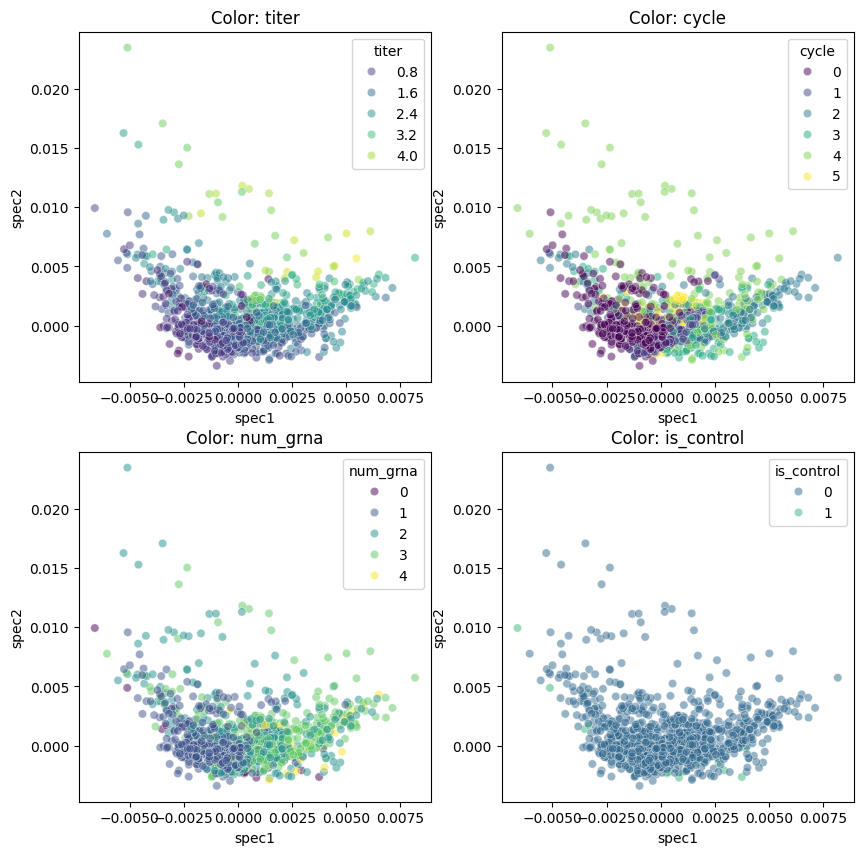

In [49]:
X_spec = SpectralEmbedding(n_components=2,affinity='rbf').fit_transform(X_norm)
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize = (10,10))
df_plot = pd.DataFrame(dict(spec1 = X_spec[:,0], spec2 = X_spec[:, 1], titer = y, cycle = cycle_label, num_grna = num_grna, is_control = is_control))

c_lbls = ['titer', 'cycle', 'num_grna', 'is_control']
for idx, axis in enumerate(fig.get_axes()):
    sns.scatterplot(df_plot, x = 'spec1', y = 'spec2', hue = c_lbls[idx], palette = 'viridis', ax = axis, alpha = 0.5)
    axis.set_title(f'Color: {c_lbls[idx]}')

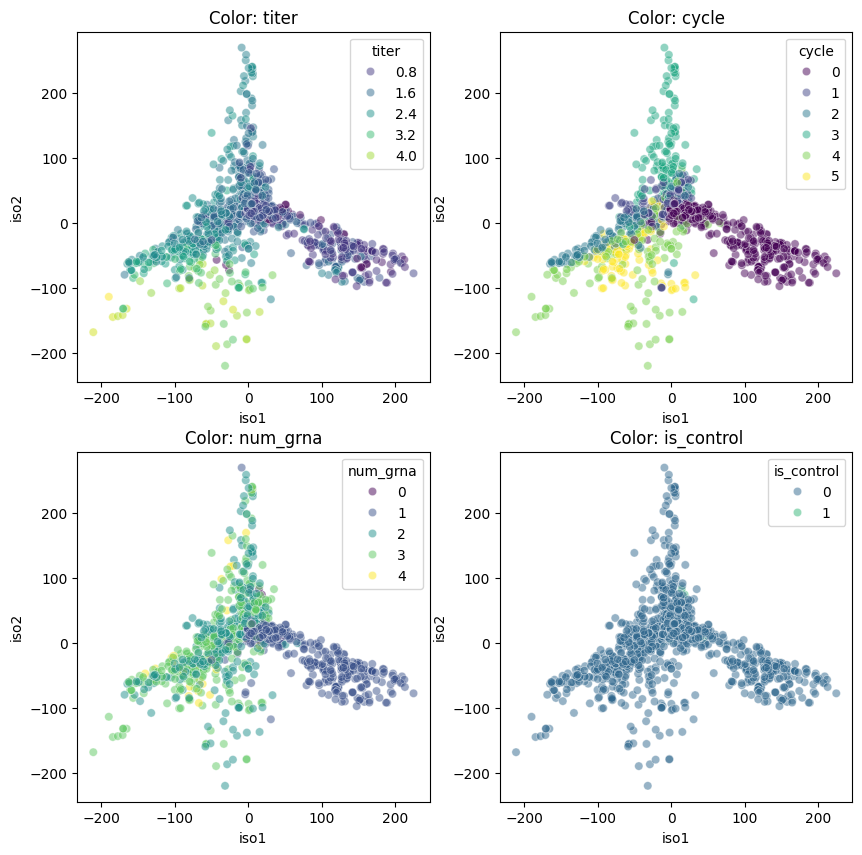

In [50]:
X_iso = Isomap(n_components=2).fit_transform(X_norm)
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize = (10,10))
df_plot = pd.DataFrame(dict(iso1 = X_iso[:,0], iso2 = X_iso[:, 1], titer = y, cycle = cycle_label, num_grna = num_grna, is_control = is_control))

c_lbls = ['titer', 'cycle', 'num_grna', 'is_control']
for idx, axis in enumerate(fig.get_axes()):
    sns.scatterplot(df_plot, x = 'iso1', y = 'iso2', hue = c_lbls[idx], palette = 'viridis', ax = axis, alpha = 0.5)
    axis.set_title(f'Color: {c_lbls[idx]}')

In [51]:
assert 1 == 2

AssertionError: 

### LASSO
LASSO is a form of linear regression, which identifies models that look like this:

$titer = b_1 * P_1 + b_2 * P_2 + ... + b_n + P_n$

where the b values are coefficients to be learned and the P values are measured proteomics. 

LASSO uses regularization to identify sparse models. Regularization penalizes models with large coefficient values, which can prevent overfitting. Specifically, LASSO regularization favors models with parameters that are exactly zero, so it can be used to identify important features by looking at which small set of features is used to predict titer.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_predict

Demonstration of lasso - create a regularized model and predict titer using cross validation.

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
alpha1 = 0.01
reg1 = Lasso(alpha = alpha1, max_iter = 10000)

y_pred = cross_val_predict(reg1, X_norm, y)
ax[0].scatter(y, y_pred, c = 'k', alpha = 0.5)
ax[0].set_xlabel('True titer')
ax[0].set_ylabel('Predicted titer')
ax[0].set_title(f'Alpha = {alpha1}')
reg1.fit(X_norm, y)
model_coefficients = reg1.coef_
print(f'Alpha = {alpha1}: There are {np.sum(np.abs(model_coefficients) > 0.0001)} non-zero coefficients out of {len(model_coefficients)} total coefficients.') 
lims = [0, 3]
# now plot both limits against eachother
ax[0].plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax[0].set_aspect('equal')
ax[0].set_xlim(lims)
ax[0].set_ylim(lims)

alpha2 = 0.0001
reg10 = Lasso(alpha = alpha2, max_iter = 10000)

y_pred = cross_val_predict(reg10, X_norm, y)
ax[1].scatter(y, y_pred, c = 'k', alpha = 0.5)
ax[1].set_xlabel('True titer')
ax[1].set_ylabel('Predicted titer')
ax[1].set_title(f'Alpha = {alpha2}')
reg10.fit(X_norm, y)
model_coefficients = reg10.coef_
ax[1].plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax[1].set_aspect('equal')
ax[1].set_xlim(lims)
ax[1].set_ylim(lims)

print(f'Alpha = {alpha2}: There are {np.sum(np.abs(model_coefficients) > 0.0001)} non-zero coefficients out of {len(model_coefficients)} total coefficients.') 



We can plot a range of alpha values and see that as regularization increases (alpha increases) the number of nonzero parameters decreases. We can also see that fewer parameters actually yields a better model (decreasing MAE), up to a point.

In [ ]:
alpha_vec = np.linspace(0.1, 2, 20)
# alpha_vec = np.logspace(-6,-1, 2)
alpha_plot_vec = [1e-5, 1e-4, 1e-3, 1e-2]
alpha_vec = np.unique(np.sort(np.concatenate((alpha_vec, alpha_plot_vec))))
reg_all = []
y_pred_all = np.zeros([len(alpha_vec), len(y)])
mae = []
# plt.figure()
for idx, alpha in enumerate(alpha_vec):
    print(idx)
    # plt.subplot(4,5,idx+1)
    reg = Lasso(alpha = alpha, max_iter=10000)
    # reg = Lasso(alpha = alpha)

    reg.fit(X_norm,y)
    y_pred = cross_val_predict(reg, X_norm, y)
    reg_all.append(reg)
    y_pred_all[idx, :] = y_pred
    # plt.scatter(y, y_pred, s = 10)
    mae.append(1/len(y) * np.sum(np.abs(y-y_pred)))
mae = np.array(mae)

In [ ]:
n_zero_params = np.array([np.sum(np.abs(r.coef_)<0.0001) for r in reg_all])
n_nonzero_params = np.array([np.sum(np.abs(r.coef_)>0.0001) for r in reg_all])
fig, ax = plt.subplots(nrows =2,ncols = 1)
ax[0].semilogx(alpha_vec, mae, 'k')
ax[1].semilogx(alpha_vec, n_nonzero_params, 'k')
ax[0].set_ylabel('Mean Abs. Error')
ax[1].set_ylabel('Non-zero parameters')
ax[1].set_xlabel('Alpha')

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure( figsize = (6,10))

gs = GridSpec(3, 4, figure=fig)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax_scatter = [fig.add_subplot(gs[2,i]) for i in [0,1,2,3]]

ax1.semilogx(alpha_vec, mae, 'k')
ax2.semilogx(alpha_vec, n_nonzero_params, 'k')

alpha_plot_indices = np.array([np.where(alpha_vec == ii)[0][0] for ii in alpha_plot_vec]).astype(int)
ax1.scatter(alpha_vec[alpha_plot_indices], mae[alpha_plot_indices], c = 'r')
ax2.scatter(alpha_vec[alpha_plot_indices], n_nonzero_params[alpha_plot_indices], c = 'r')

for ii, ax in enumerate(ax_scatter):
    reg = Lasso(alpha = alpha_plot_vec[ii], max_iter = 10000)

    y_pred = cross_val_predict(reg, X_norm, y)
    ax.scatter(y, y_pred, c='k', s = 10, alpha = 0.5)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    lims = [0, 3]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'r-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_title('a = {:.0e}'.format(alpha_plot_vec[ii]))
    ax.set_xlabel('y')
    if ii>0:
        ax.set_yticklabels([])
        ax.set_yticks([])
ax_scatter[0].set_ylabel('y predicted')
ax1.set_ylabel('Mean Abs. Error')
ax2.set_ylabel('# of nonzero params')
ax2.set_xlabel('alpha - higher = more sparse') 
ax2.legend(['All alpha values', 'plotted models'])
fig.savefig('./figures/LASSO_results.png')

We can also plot the coefficients for a specific alpha value. Here I'll use 10 (1e1), since it fits the data pretty well and doesn't have very many non-zero coefficients. 

In [ ]:
alpha_for_features = 1e-2
reg = Lasso(alpha = alpha_for_features)
reg.fit(X_norm, y)
coefficients = reg.coef_
coef_df = pd.DataFrame(data = coefficients, index = X_norm_df.columns, columns = ['coefficient'])

fig, ax = plt.subplots(figsize = (6,20))
sns.barplot(coef_df[coef_df['coefficient']!=0].sort_values('coefficient', ascending = False).T,
            orient = 'h', ax = ax)
ax.set_xlabel('LASSO coefficient value')
ax.set_title(f'Non-zero LASSO coefficients - alpha = {alpha_for_features}')

fig.savefig('./figures/LASSO_coefficients.png')

### Train model on round 1 and 2 to predict round 3

In [ ]:
X_norm_c1c2 = X_norm[np.array(cycle_label) <= 2,:]
X_norm_c3 = X_norm[np.array(cycle_label) == 3,:]
X_norm_c4 = X_norm[np.array(cycle_label) == 4,:]

y_c1c2 = y[np.array(cycle_label) <= 2]
y_c3 = y[np.array(cycle_label) == 3]
y_c4 = y[np.array(cycle_label) == 4]
print(f"x_norm_c1c2 shape: {X_norm_c1c2.shape}\tx_norm_c3 shape: {X_norm_c3.shape}\tx_norm_c4 shape: {X_norm_c4.shape}")


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

alpha = .02
reg = Lasso(alpha = alpha)
reg.fit(X_norm_c1c2, y_c1c2)
pred_c1c2 = reg.predict(X_norm_c1c2)
pred_c3 = reg.predict(X_norm_c3)
pred_c4 = reg.predict(X_norm_c4)
coef = reg.coef_
n_nonzero = sum(coef>0)

lims = [-.5, 4]
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize = (15,6))
for i, data in enumerate([[pred_c1c2, y_c1c2],
                          [pred_c3, y_c3],
                          [pred_c4, y_c4]
                         ]):
    ax[i].scatter(data[0], data[1], color= 'k', alpha = 0.3)
    ax[i].plot(lims, lims, 'k--')
    # ax[i].set_xlim(lims)
    # ax[i].set_ylim(lims)
    ax[i].set_xlabel('Predicted')
    ax[i].set_ylabel('Measured')
    r2 = r2_score(data[0], data[1])
    mae = mean_absolute_error(data[0], data[1])
    ax[i].text(0, lims[1]*0.8,
               f"R2 = {r2:.4f}\nMAE = {mae:.4f}")

ax[0].set_title('DBTL0 and DBTL1 - training data')
ax[1].set_title('DBTL2 - held-out data')
ax[2].set_title('DBTL3 - held-out data')

plt.suptitle(f"Fitting LASSO to DBTL0/1 and testing on DBTL2 - N = {n_nonzero} parameters")
fig.savefig('./figures/LASSO_c0c1train_c2test.png')

coefficients = reg.coef_
coef_df = pd.DataFrame(data = coefficients, index = X_norm_df.columns, columns = ['coefficient'])
fig, ax = plt.subplots(figsize = (6,20))
sns.barplot(coef_df[coef_df['coefficient']!=0].sort_values('coefficient', ascending = False).T,
            orient = 'h', ax = ax)
ax.set_xlabel('LASSO coefficient value')
ax.set_title(f'Non-zero LASSO coefficients - alpha = {alpha}')
fig.savefig('./figures/LASSO_coefficients_DBTL2holdout.png')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
n_coef_plot = 8
sns.barplot(coef_df[coef_df['coefficient']!=0].sort_values('coefficient', ascending = False)[:n_coef_plot].T,
            orient = 'h', ax = ax[0])
sns.barplot(coef_df[coef_df['coefficient']!=0].sort_values('coefficient', ascending = True)[:n_coef_plot].T,
            orient = 'h', ax = ax[1])
ax[0].set_xlabel('LASSO coefficient value')
ax[1].set_xlabel('LASSO coefficient value')
ax[0].set_xlim([-0.15, 0.15])
ax[1].set_xlim([-0.15, 0.15])
ax[0].set_title(f'Largest LASSO coefficients - alpha = {alpha}')
ax[1].set_title(f'Smallest LASSO coefficients - alpha = {alpha}')

fig.savefig('./figures/LASSO_coefficients_DBTL2holdout_subset.png')

### Shapley analysis
Shapley analysis aims to identify the most important features for making accurate predictions. It does this by imagining that different subsets of features are different 'teams' playing against each other to win a 'game' by having the best prediction accuracy. By looking at which features are in the best performing 'team' (set of features) we can infer which features are required for good predictions. 

In [ ]:
import xgboost
import shap

In [ ]:
model_xgb = xgboost.XGBRegressor(n_estimators = 100, max_depth = 2).fit(X_norm_df,y)
X_subset = X_norm_df.iloc[:20,:]
explainer_xgb = shap.Explainer(model_xgb, X_subset)
shap_values_xgb = explainer_xgb(X_norm_df)
sample_ind = 20

In [ ]:
shap.plots.beeswarm(shap_values_xgb)


In [ ]:
shap_ordering = np.mean(np.abs(shap_values_xgb.values), axis = 0)
shap_ordering.shape
shap_index = np.argsort(-shap_ordering)[:8]

In [ ]:
shap_index

In [ ]:
shap_ordering[shap_index]

In [ ]:
fig, ax = plt.subplots(2,4, figsize = (10,6), sharex=True, sharey =False)
for plot_idx, shap_idx in enumerate(shap_index):
    fig.axes[plot_idx].scatter(X_norm_df.iloc[:, shap_idx], y, s = 10, c = 'k', alpha = 0.4)
    fig.axes[plot_idx].set_title(X_norm_df.columns[shap_idx])
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Normalized Proteomics measurement")
plt.ylabel("Isoprenol Titer")   
plt.suptitle('Highest shapley value features')

In [ ]:
shap_index_lowest = np.argsort(shap_ordering)[:8]
shap_ordering[shap_index_lowest]

In [ ]:
fig, ax = plt.subplots(2,4, figsize = (10,6), sharex=True, sharey =True)
for plot_idx, shap_idx in enumerate(shap_index_lowest):
    fig.axes[plot_idx].scatter(X_norm_df.iloc[:, shap_idx], y, s = 10, c = 'k', alpha = 0.4)
    fig.axes[plot_idx].set_title(X_norm_df.columns[shap_idx])
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Normalized Proteomics measurement")
plt.ylabel("Isoprenol Titer")   
plt.suptitle('Lowest shapley value features - all zero')

## LASSO for dCas9

In [ ]:
# alpha_vec = np.linspace(0.1, 2, 20)
alpha_vec = np.logspace(-4,3, 25)
alpha_plot_vec = [1e-3, 1e-1, 1e1, 1e3]
alpha_vec = np.unique(np.sort(np.concatenate((alpha_vec, alpha_plot_vec))))
reg_all = []
y_pred_all = np.zeros([len(alpha_vec), len(y)])
mae = []
# plt.figure()
for idx, alpha in enumerate(alpha_vec):
    print(idx)
    # plt.subplot(4,5,idx+1)
    reg = Lasso(alpha = alpha, max_iter=10000)
    # reg = Lasso(alpha = alpha)

    reg.fit(X_dcas9_norm,y_dcas9)
    y_pred = cross_val_predict(reg, X_dcas9_norm, y_dcas9)
    reg_all.append(reg)
    y_pred_all[idx, :] = y_pred
    # plt.scatter(y, y_pred, s = 10)
    mae.append(1/len(y) * np.sum(np.abs(y-y_pred)))
mae = np.array(mae)

In [ ]:
n_zero_params = np.array([np.sum(np.abs(r.coef_)<0.0001) for r in reg_all])
n_nonzero_params = np.array([np.sum(np.abs(r.coef_)>0.0001) for r in reg_all])
fig, ax = plt.subplots(nrows =2,ncols = 1)
ax[0].semilogx(alpha_vec, mae, 'k')
ax[1].semilogx(alpha_vec, n_nonzero_params, 'k')
ax[0].set_ylabel('Mean Abs. Error')
ax[1].set_ylabel('Non-zero parameters')
ax[1].set_xlabel('Alpha')

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure( figsize = (6,10))

gs = GridSpec(3, 4, figure=fig)
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax_scatter = [fig.add_subplot(gs[2,i]) for i in [0,1,2,3]]

ax1.semilogx(alpha_vec, mae, 'k')
ax2.semilogx(alpha_vec, n_nonzero_params, 'k')

alpha_plot_indices = np.array([np.where(alpha_vec == ii)[0][0] for ii in alpha_plot_vec]).astype(int)
ax1.scatter(alpha_vec[alpha_plot_indices], mae[alpha_plot_indices], c = 'r')
ax2.scatter(alpha_vec[alpha_plot_indices], n_nonzero_params[alpha_plot_indices], c = 'r')

for ii, ax in enumerate(ax_scatter):
    reg = Lasso(alpha = alpha_plot_vec[ii], max_iter = 10000)

    y_pred = cross_val_predict(reg, X_dcas9_norm, y_dcas9)
    ax.scatter(y_dcas9, y_pred, c='k', s = 10, alpha = 0.5)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    lims = [0, 3]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'r-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_title('a = {:.0e}'.format(alpha_plot_vec[ii]))
    ax.set_xlabel('y')
    if ii>0:
        ax.set_yticklabels([])
        ax.set_yticks([])
ax_scatter[0].set_ylabel('y predicted')
ax1.set_ylabel('Mean Abs. Error')
ax2.set_ylabel('# of nonzero params')
ax2.set_xlabel('alpha - higher = more sparse') 
ax2.legend(['All alpha values', 'plotted models'])

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))
alpha1 = 1*10**-3
reg1 = Lasso(alpha = alpha1, max_iter = 10000)

y_pred = cross_val_predict(reg1, X_dcas9_norm, y_dcas9)
ax.scatter(y, y_pred, c = 'k', alpha = 0.5)
ax.set_xlabel('True titer')
ax.set_ylabel('Predicted titer')
ax.set_title(f'Alpha = {alpha1}')
reg1.fit(X_norm, y)
model_coefficients = reg1.coef_
print(f'Alpha = {alpha1}: There are {np.sum(np.abs(model_coefficients) > 0.0001)} non-zero coefficients out of {len(model_coefficients)} total coefficients.') 
lims = [0, 3]
# now plot both limits against eachother
ax.plot(lims, lims, 'r-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)